# Attribute Prediction for Fashion Product Images

In [1]:
import sys
sys.path.append("../python_code")
from AttrPredModel import AttrPred_Resnet50
from iMatDataset import iMatDataset
import matplotlib.pyplot as plt

### loading dataset

In [2]:
ds = iMatDataset(labels_file="../Data/iMaterialist/validation.json", img_dir="../Data/iMaterialist/validation", attr_descr_file="../Data/iMaterialist/iMat_fashion_2018_label_map_228.csv",
                rgb_mean=[0.6742, 0.6307, 0.6173], rgb_std=[0.6742, 0.6307, 0.6173])

### loading model

In [3]:
# path to downloaded model file. Must be adapted to fit your file structure!
model_path = "../TrainedModels/epoch=3.ckpt"
model = AttrPred_Resnet50.load_from_checkpoint(model_path)
model.eval()
print("Model Loaded successfully")

Model Loaded successfully


### predicting attributes

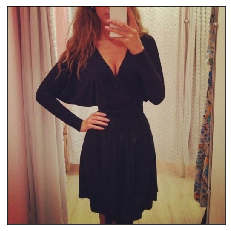

Predicted Attributes: ['Black', 'Female', 'Long Sleeved', 'V-Necks']





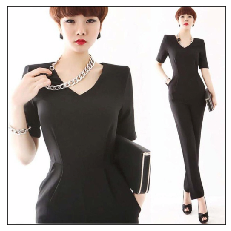

Predicted Attributes: ['Black', 'Female', 'V-Necks']





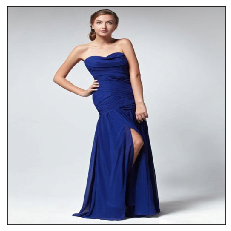

Predicted Attributes: ['Female', 'Ruched', 'Strapless', 'Sweetheart Neckline']





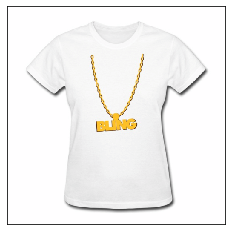

Predicted Attributes: ['Cotton', 'Female', 'Round Neck', 'Short Sleeves', 'T-Shirts']





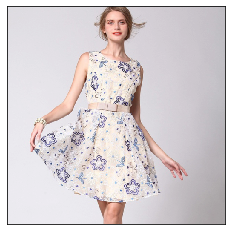

Predicted Attributes: ['Female', 'Round Neck', 'Sleeveless']





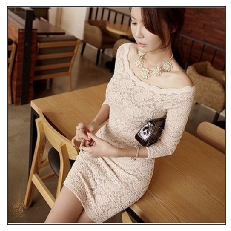

Predicted Attributes: ['Female', 'Lace', 'Long Sleeved', 'Round Neck']





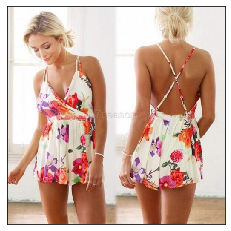

Predicted Attributes: ['Backless Dresses', 'Female', 'Jumpsuits Overalls & Rompers', 'Sleeveless', 'Spaghetti Straps']





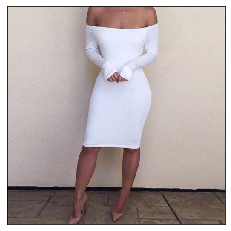

Predicted Attributes: ['Bodycon', 'Dresses', 'Female', 'Long Sleeved', 'Off The Shoulder', 'White']





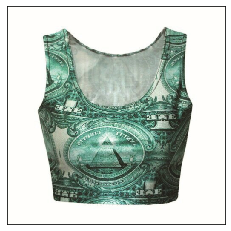

Predicted Attributes: ['Female', 'Printed', 'Sleeveless', 'Spandex']





In [8]:
for i in range(min(19, len(ds))):
    img_tensor, _ = ds[i]
    img_pil = ds.trafo_tensor2pil(img_tensor)
    pred_attr_scores = model(img_tensor.unsqueeze(0))[0]
    pred_attributes = ds.OH2AttrName(pred_attr_scores>0)
    plt.imshow(img_pil)
    ax = plt.gca()
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
    plt.show()
    fig = plt.gcf()
    plt.close(fig)
    print("Predicted Attributes:", pred_attributes)
    print("\n\n")